## e007 EDA
 * threshold over features

In [4]:
import pandas as pd
import numpy as np
import gc
import pickle
import pyarrow.parquet as pq
from multiprocessing import Pool
from tqdm import tqdm_notebook as tqdm

import scipy
from scipy import signal
from scipy.signal import butter

from matplotlib import pyplot as plt
import seaborn as sns

import sys
sys.path.append('../../guchio_utils/')

In [2]:
#plt.rcParams['font.family'] = 'IPAPGothic' #全体のフォントを設定
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%config InlineBackend.figure_formats = {'png', 'retina'}
%load_ext autoreload
%autoreload 1

In [3]:
#trn_df = pd.read_parquet('../inputs/origin/train.parquet.zip', compression='zip')
trn_df = pq.read_pandas('../inputs/origin/train.parquet').to_pandas()
trn_meta_df = pd.read_csv('../inputs/origin/metadata_train.csv')

In [4]:
temp_df = trn_df.iloc[:, :3]
temp_df

,0,1,2
0,18,1,-19
1,18,0,-19
2,17,-1,-20
3,18,1,-19
4,18,0,-19
5,18,0,-20
6,19,1,-18
7,18,0,-19
8,18,0,-20
9,17,0,-19


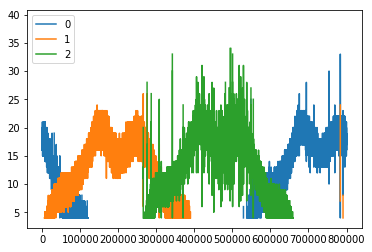

In [6]:
temp_df[temp_df > 3].plot()

In [16]:
# count features
feature_df = pd.DataFrame()
feature_df['count'] = temp_df[temp_df > 20].count()
feature_df

,count
0,5422
1,4426
2,17813


In [17]:
# timestamp の std
for_df = temp_df[temp_df > 3]
feature_df['th_time_std'] = [np.std(for_df[col].dropna().index) for col in for_df.columns]
feature_df

,count,th_time_std
0,5422,291360.796057
1,4426,106482.649029
2,17813,107251.769468


In [21]:
import scipy
[scipy.stats.skew(for_df[col].dropna()) for col in for_df.columns]

[-0.11018277346316882, -0.10197952892711143, -0.14143376713156125]

In [23]:
np.std(np.nan)

nan

In [ ]:
e007_hp_dn_abs_thresh_overs_th1_count
e007_hp_dn_abs_thresh_overs_th1_time_std
e007_hp_dn_abs_thresh_overs_th1_time_skew
e007_hp_dn_abs_thresh_overs_th1_time_kurt
e007_hp_dn_abs_thresh_overs_th3_count
e007_hp_dn_abs_thresh_overs_th3_time_std
e007_hp_dn_abs_thresh_overs_th3_time_skew
e007_hp_dn_abs_thresh_overs_th3_time_kurt
e007_hp_dn_abs_thresh_overs_th5_count
e007_hp_dn_abs_thresh_overs_th5_time_std
e007_hp_dn_abs_thresh_overs_th5_time_skew
e007_hp_dn_abs_thresh_overs_th5_time_kurt
e007_hp_dn_abs_thresh_overs_th10_count
e007_hp_dn_abs_thresh_overs_th10_time_std
e007_hp_dn_abs_thresh_overs_th10_time_skew
e007_hp_dn_abs_thresh_overs_th10_time_kurt

In [6]:
sys.path.append('../')
fin = open('../trained_models/e007_2019-01-16-03-05-50_0.5354_0.35_models.pkl', 'rb')
pickle.load(fin)

TypeError: 'function' object is not iterable